In [2]:
import numpy as np
import pandas as pd

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]

In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
train_directory='/content/drive/MyDrive/project/animal/train'
test_directory='/content/drive/MyDrive/project/animal/test'
val_directory='/content/drive/MyDrive/project/animal/val'

In [7]:
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/project/animal/train/*')
len(folders)

15

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │         376,335 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 15,091,023 (57.57 MB)

 Trainable params: 376,335 (1.44 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode =  'categorical')


Found 1549 images belonging to 15 classes.
Found 208 images belonging to 15 classes.


In [12]:
print(len(training_set)) # number of batches
print(len(test_set))

49
7


In [13]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 649s 11s/step - accuracy: 0.2436 - loss: 3.0511 - val_accuracy: 0.5577 - val_loss: 1.4808
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 397ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 506ms/step - accuracy: 0.6903 - loss: 0.9907 - val_accuracy: 0.6442 - val_loss: 1.1164
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 503ms/step - accuracy: 0.7774 - loss: 0.7351 - val_accuracy: 0.6779 - val_loss: 1.0590
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 501ms/step - accuracy: 0.8127 - loss: 0.6334 - val_accuracy: 0.7212 - val_loss: 0.9094
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 491ms/step - accuracy: 0.8265 - loss: 0.5798 - val_accuracy: 0.7115 - val_loss: 1.0386
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


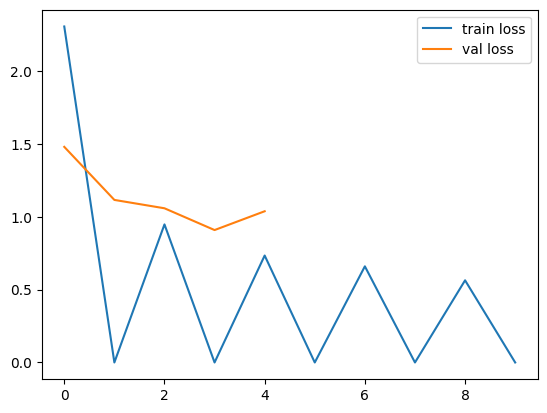

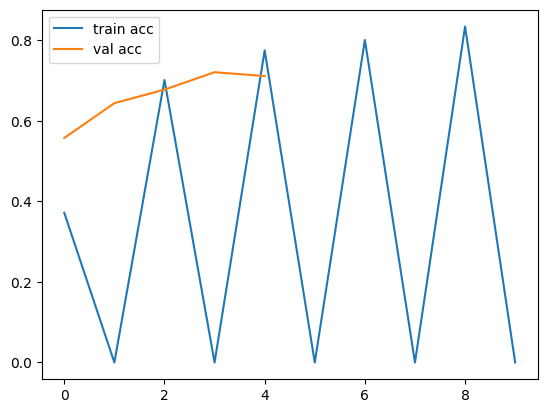

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [15]:
model.save('BCD.h5')

In [18]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array

# Check if the model file exists before attempting to load it
import os
if os.path.exists('/content/BCD.h5'):
    model1 = load_model('/content/BCD.h5',compile=False)
else:
    print("Model file not found. Please make sure it is saved in the correct location.")

lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [19]:
lab

{0: 'Bear',
 1: 'Bird',
 2: 'Cat',
 3: 'Cow',
 4: 'Deer',
 5: 'Dog',
 6: 'Dolphin',
 7: 'Elephant',
 8: 'Giraffe',
 9: 'Horse',
 10: 'Kangaroo',
 11: 'Lion',
 12: 'Panda',
 13: 'Tiger',
 14: 'Zebra'}

In [20]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'Deer'

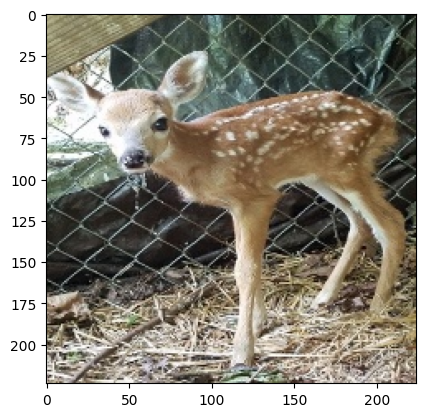

In [21]:
img='/content/drive/MyDrive/project/animal/test/Deer/Deer_20_1.jpg'
pic=load_img('/content/drive/MyDrive/project/animal/test/Deer/Deer_20_1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'Horse'

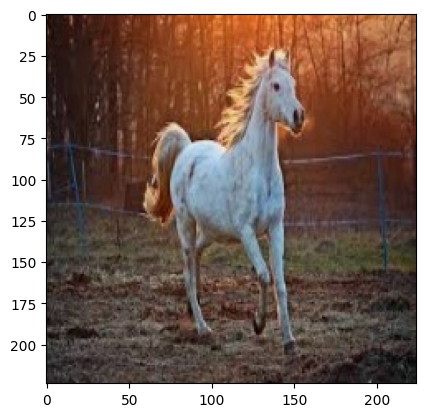

In [23]:
img='/content/drive/MyDrive/project/animal/test/Horse/Horse_19_1.jpg'
pic=load_img('/content/drive/MyDrive/project/animal/test/Horse/Horse_19_1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)